In [2]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, Visualiser

# create an initial but optional config and an api client
config = ECConfig()
preprocessing = Preprocessing()
visualiser = Visualiser()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Initializing pre-processing class
Initializing visualisation class


In [33]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])


# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting 10 tracks inside the bbox
# track_df

In [40]:
import plotly.express as px
track_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting 10 tracks inside the bbox

track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)

track_df = preprocessing.remove_outliers(track_df, 'CO2.value')

# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(track_df, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, after cleaning", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

30            NaN
265           NaN
0      267.768457
0      267.768457
548     34.405513
          ...    
36       2.295065
263      0.000000
264      0.000000
28       0.000000
29       0.000000
Name: CO2.value, Length: 1956, dtype: float64
548    34.405513
606    32.184552
422    31.964958
547    30.350080
423    29.490677
         ...    
36      2.295065
29      0.000000
263     0.000000
264     0.000000
28      0.000000
Name: CO2.value, Length: 1952, dtype: float64


In [43]:
track_df = preprocessing.calculateAcceleration(track_df)

# Visualizing points by the Acceleration Value
fig = px.scatter_mapbox(track_df, lat="lat", lon="lng", color="Acceleration.value", title="Acceleration along the track", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

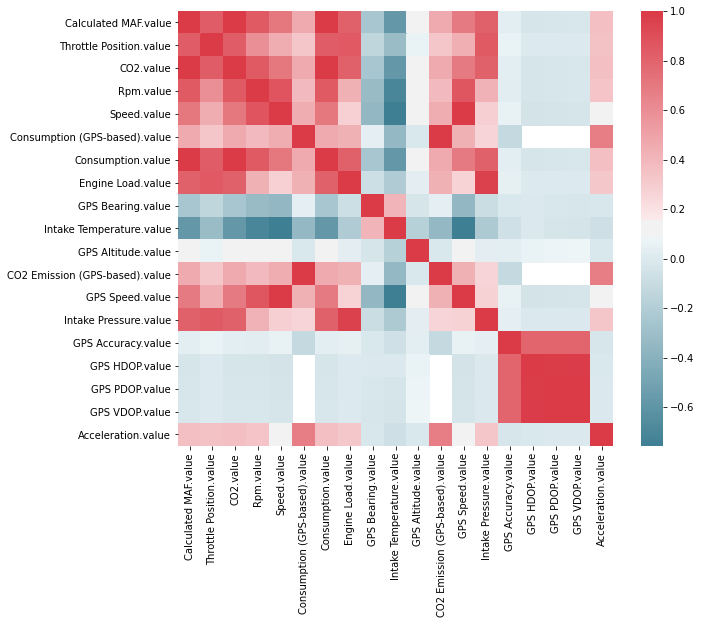

In [44]:
visualiser.plot_full_correlation(track_df)

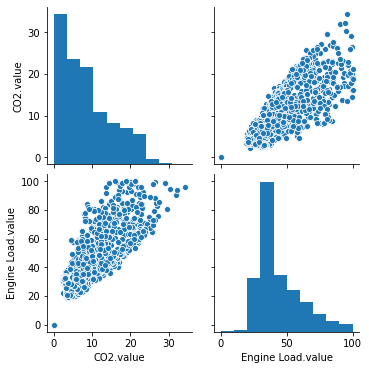

In [45]:
visualiser.plot_pair_correlation(track_df, "CO2.value", "Engine Load.value")

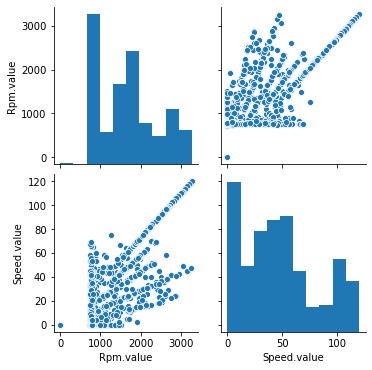

In [46]:
visualiser.plot_pair_correlation(track_df, "Rpm.value", "Speed.value")

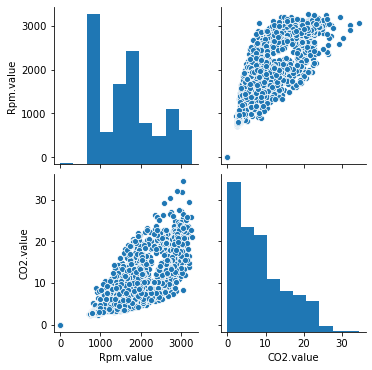

In [47]:
visualiser.plot_pair_correlation(track_df, "Rpm.value", "CO2.value")

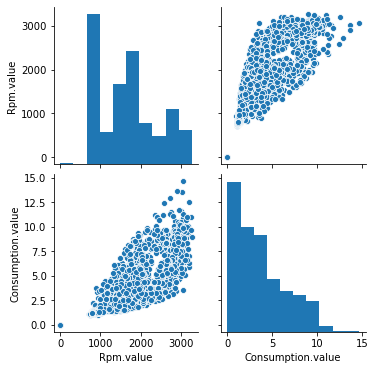

In [48]:
visualiser.plot_pair_correlation(track_df, "Rpm.value", "Consumption.value")

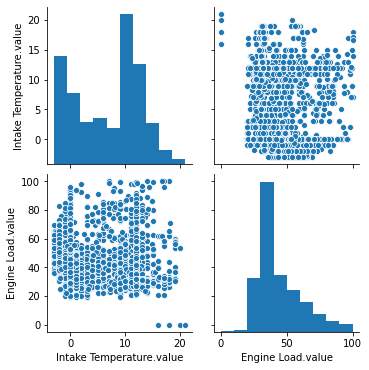

In [52]:
visualiser.plot_pair_correlation(track_df, "Intake Temperature.value", "Engine Load.value")